Input variable with the highest discriminative power: degree_spondylolisthesis
Input variable with the lowest discriminative power: pelvic_radius


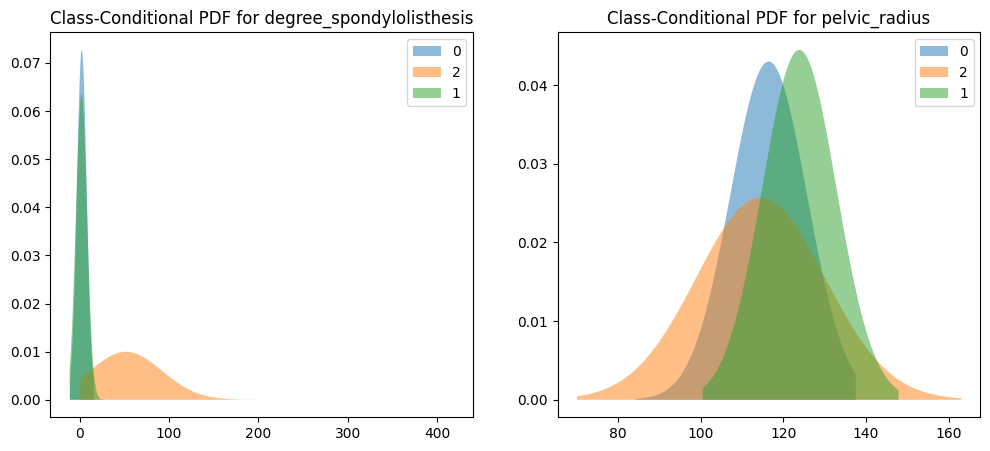

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm

# Load the ARFF data
data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

# Encode the 'class' column into numerical values and ensure they are ordered as 0, 1, 2
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Define the input variables (first 6 columns)
X = df.iloc[:, :-1]
y = df['class']

# Use f_classif to assess the discriminative power of input variables
f_scores, _ = f_classif(X, y)

# Find the input variable with the highest and lowest discriminative power
highest_discriminative_index = np.argmax(f_scores)
lowest_discriminative_index = np.argmin(f_scores)

highest_discriminative_variable = X.columns[highest_discriminative_index]
lowest_discriminative_variable = X.columns[lowest_discriminative_index]

print("Input variable with the highest discriminative power:", highest_discriminative_variable)
print("Input variable with the lowest discriminative power:", lowest_discriminative_variable)

# Plot the class-conditional probability density functions for the highest and lowest discriminative variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in df['class'].unique():
    subset = df[df['class'] == label]
    variable_data = subset[highest_discriminative_variable]
    mu, std = norm.fit(variable_data)
    xmin, xmax = min(variable_data), max(variable_data)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.fill_between(x, 0, p, alpha=0.5, label=label)
plt.title(f'Class-Conditional PDF for {highest_discriminative_variable}')
plt.legend()

plt.subplot(1, 2, 2)
for label in df['class'].unique():
    subset = df[df['class'] == label]
    variable_data = subset[lowest_discriminative_variable]
    mu, std = norm.fit(variable_data)
    xmin, xmax = min(variable_data), max(variable_data)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.fill_between(x, 0, p, alpha=0.5, label=label)
plt.title(f'Class-Conditional PDF for {lowest_discriminative_variable}')
plt.legend()

plt.show()


Depth Limit: 1, Training Accuracy: 0.7834, Testing Accuracy: 0.7527
Depth Limit: 2, Training Accuracy: 0.8433, Testing Accuracy: 0.7849
Depth Limit: 3, Training Accuracy: 0.8525, Testing Accuracy: 0.7849
Depth Limit: 4, Training Accuracy: 0.8986, Testing Accuracy: 0.8495
Depth Limit: 5, Training Accuracy: 0.9263, Testing Accuracy: 0.8495
Depth Limit: 6, Training Accuracy: 0.9677, Testing Accuracy: 0.8172
Depth Limit: 8, Training Accuracy: 1.0000, Testing Accuracy: 0.8065
Depth Limit: 10, Training Accuracy: 1.0000, Testing Accuracy: 0.8065


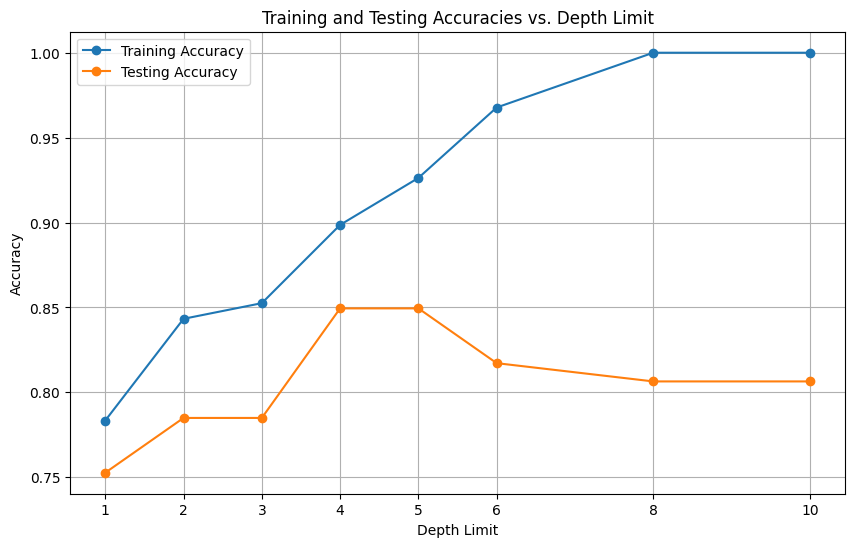

In [3]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

train_accuracies = []
test_accuracies = []

# Train decision trees with different depth limits
for depth_limit in depth_limits:
    clf = DecisionTreeClassifier(max_depth=depth_limit, random_state=0)
    clf.fit(X_train, y_train)
    
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Depth Limit: {depth_limit}, Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")


# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_limits, test_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. Depth Limit')
plt.xticks(depth_limits)
plt.legend()
plt.grid()
plt.show()


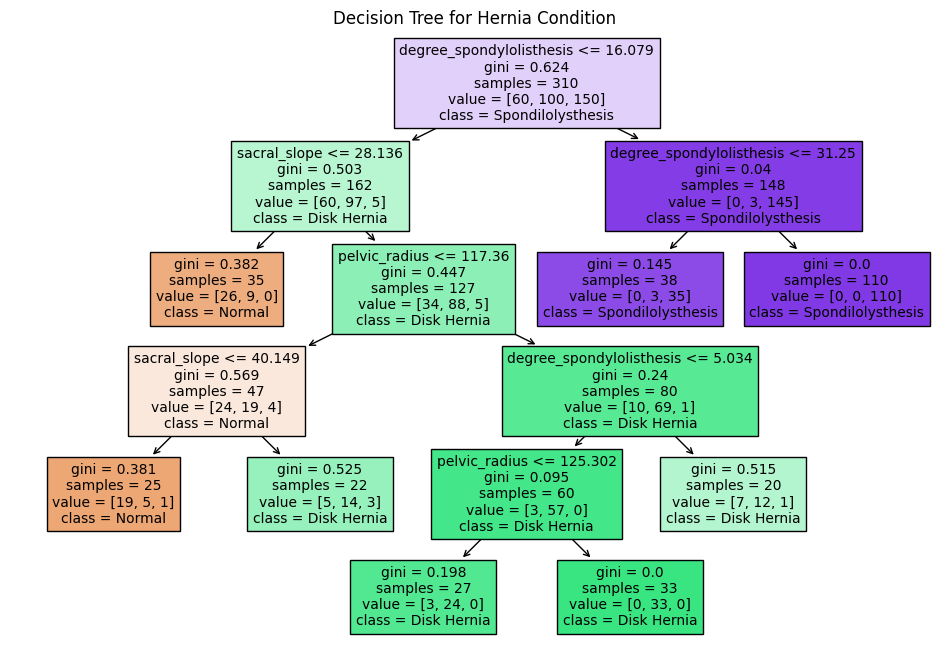

In [7]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

X = df.drop(columns=['class'])
y = df['class']


clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)

clf.fit(X, y)

# Plot
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Normal", "Disk Hernia", "Spondilolysthesis"], filled=True, fontsize=10)
plt.title("Decision Tree for Hernia Condition")
plt.show()
